In [23]:
from pathlib import Path
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn import preprocessing
from sklearn.cluster import KMeans
from pandas.plotting import parallel_coordinates


In [11]:
cluster_df = pd.read_excel("Project1_Data.xlsx")
cluster_df_drop =cluster_df.drop(['site1','site2','site3','site4','site5'], axis =1)
cluster_df_drop

,userid,education,region,hhsz,age,income,child,race,connection,country,zipcode,money
0,14840503,99,4,5,6,2,1,1,1,0,94954,657.93
1,12890751,4,2,2,8,4,1,1,1,0,46038,178.80
2,13129562,4,2,4,8,5,1,1,1,0,64504,483.44
3,12910664,99,3,4,4,2,1,1,1,0,31554,148.85
4,13601071,99,3,3,7,4,0,1,1,0,40033,801.40
...,...,...,...,...,...,...,...,...,...,...,...,...
2181,14606550,99,3,2,3,3,0,1,1,0,37923,84.89
2182,14590791,99,2,3,7,7,1,1,1,0,43351,200.88
2183,14917811,1,4,2,3,2,0,1,0,0,99338,161.88
2184,14656919,99,4,2,11,7,0,1,1,0,94114,335.00


In [12]:
clusters_df_drop_norm = cluster_df_drop.apply(preprocessing.scale, axis=0)
clusters_df_drop_norm

,userid,education,region,hhsz,age,income,child,race,connection,country,zipcode,money
0,0.650578,0.583954,1.639085,1.364171,-0.290355,-1.433249,0.600954,-0.149263,0.281968,-0.392646,1.834633,0.100491
1,-0.819018,-1.681754,-0.254199,-0.943343,0.353374,-0.381879,0.600954,-0.149263,0.281968,-0.392646,0.152595,-0.522412
2,-0.639018,-1.681754,-0.254199,0.594999,0.353374,0.143806,0.600954,-0.149263,0.281968,-0.392646,0.787572,-0.126359
3,-0.804009,0.583954,0.692443,0.594999,-0.934084,-1.433249,0.600954,-0.149263,0.281968,-0.392646,-0.345455,-0.561349
4,-0.283625,0.583954,0.692443,-0.174172,0.031509,-0.381879,-1.664021,-0.149263,0.281968,-0.392646,-0.053894,0.287011
...,...,...,...,...,...,...,...,...,...,...,...,...
2181,0.474240,0.583954,0.692443,-0.943343,-1.255949,-0.907564,-1.664021,-0.149263,0.281968,-0.392646,-0.126449,-0.644501
2182,0.462362,0.583954,-0.254199,-0.174172,0.031509,1.195176,0.600954,-0.149263,0.281968,-0.392646,0.060200,-0.493706
2183,0.708848,-1.753302,1.639085,-0.943343,-1.255949,-1.433249,-1.664021,-0.149263,-3.546497,-0.392646,1.985382,-0.544409
2184,0.512205,0.583954,1.639085,-0.943343,1.318967,1.195176,-1.664021,-0.149263,0.281968,-0.392646,1.805749,-0.319341


In [34]:
kmeans = KMeans(n_clusters =10, random_state = 0).fit(clusters_df_drop_norm)
#kmeans.cluster_centers_
memb = pd.Series(kmeans.labels_, index= cluster_df_drop.index)
memb


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0       9
1       4
2       4
3       8
4       1
       ..
2181    1
2182    8
2183    2
2184    9
2185    1
Length: 2186, dtype: int32

In [35]:
for key, item in memb.groupby(memb):
    print(key,':',','.join(map(str,item.index)))

0 : 82,106,173,220,263,287,291,537,590,731,810,820,828,837,859,885,1015,1044,1085,1183,1235,1238,1254,1324,1356,1376,1421,1456,1553,1617,1635,1637,1651,1718,1801,1821,1889,2053,2066,2112,2132,2143
1 : 4,12,18,19,31,39,41,42,51,59,60,65,68,71,84,87,93,125,133,137,140,143,148,151,162,176,179,203,208,210,212,214,216,217,232,243,246,247,255,266,267,268,269,274,276,277,282,283,285,293,303,307,311,313,314,317,322,323,326,328,332,340,343,346,351,353,361,364,367,368,381,384,385,386,387,392,393,398,400,402,405,406,414,416,421,433,444,451,458,463,464,465,466,468,471,473,483,485,486,496,498,501,502,505,511,514,516,531,542,543,546,564,565,576,579,580,591,595,598,600,603,604,605,621,626,639,645,650,651,652,668,685,694,697,704,715,726,729,732,733,740,742,746,750,755,768,775,778,780,793,799,800,802,803,822,827,830,831,838,854,860,868,870,872,884,888,891,915,918,920,933,935,944,945,946,949,952,954,955,956,972,981,983,984,997,999,1008,1011,1013,1016,1018,1021,1024,1030,1031,1032,1035,1039,1042,1052,105

   userid  education  region   hhsz     age  income  child   race  connection  \
0  -0.124      0.038   0.152  0.027   0.131   0.131  0.331  0.047       0.282   
1   0.093      0.135  -0.227 -0.949  -0.069  -0.247 -1.664 -0.149       0.282   
2  -0.339     -0.062   0.108 -0.135   0.144  -0.315 -0.164 -0.149      -3.546   
3   0.206      0.584  -0.738  0.912  -0.007   0.552  0.562 -0.149       0.282   
4   0.240     -1.712  -0.361  0.476   0.073  -0.036  0.567 -0.149       0.282   
5  -0.240     -0.380  -0.005 -0.228  -0.104  -0.391 -0.194  5.430       0.013   
6  -0.141     -0.194   0.059  0.071  -0.050   0.011  0.058 -0.149       0.282   
7  -1.160      0.584  -1.201 -0.943  29.643   0.144  0.601 -0.149       0.282   
8  -0.109      0.584  -0.003 -0.238   0.010  -0.049  0.601 -0.149       0.282   
9  -0.071      0.147   1.379  0.076  -0.117  -0.029  0.171 -0.149       0.282   

   country  zipcode  money  
0   -0.393    0.277  5.133  
1   -0.393   -0.208 -0.127  
2    0.375    0.048 -

(-0.5, 7.5)

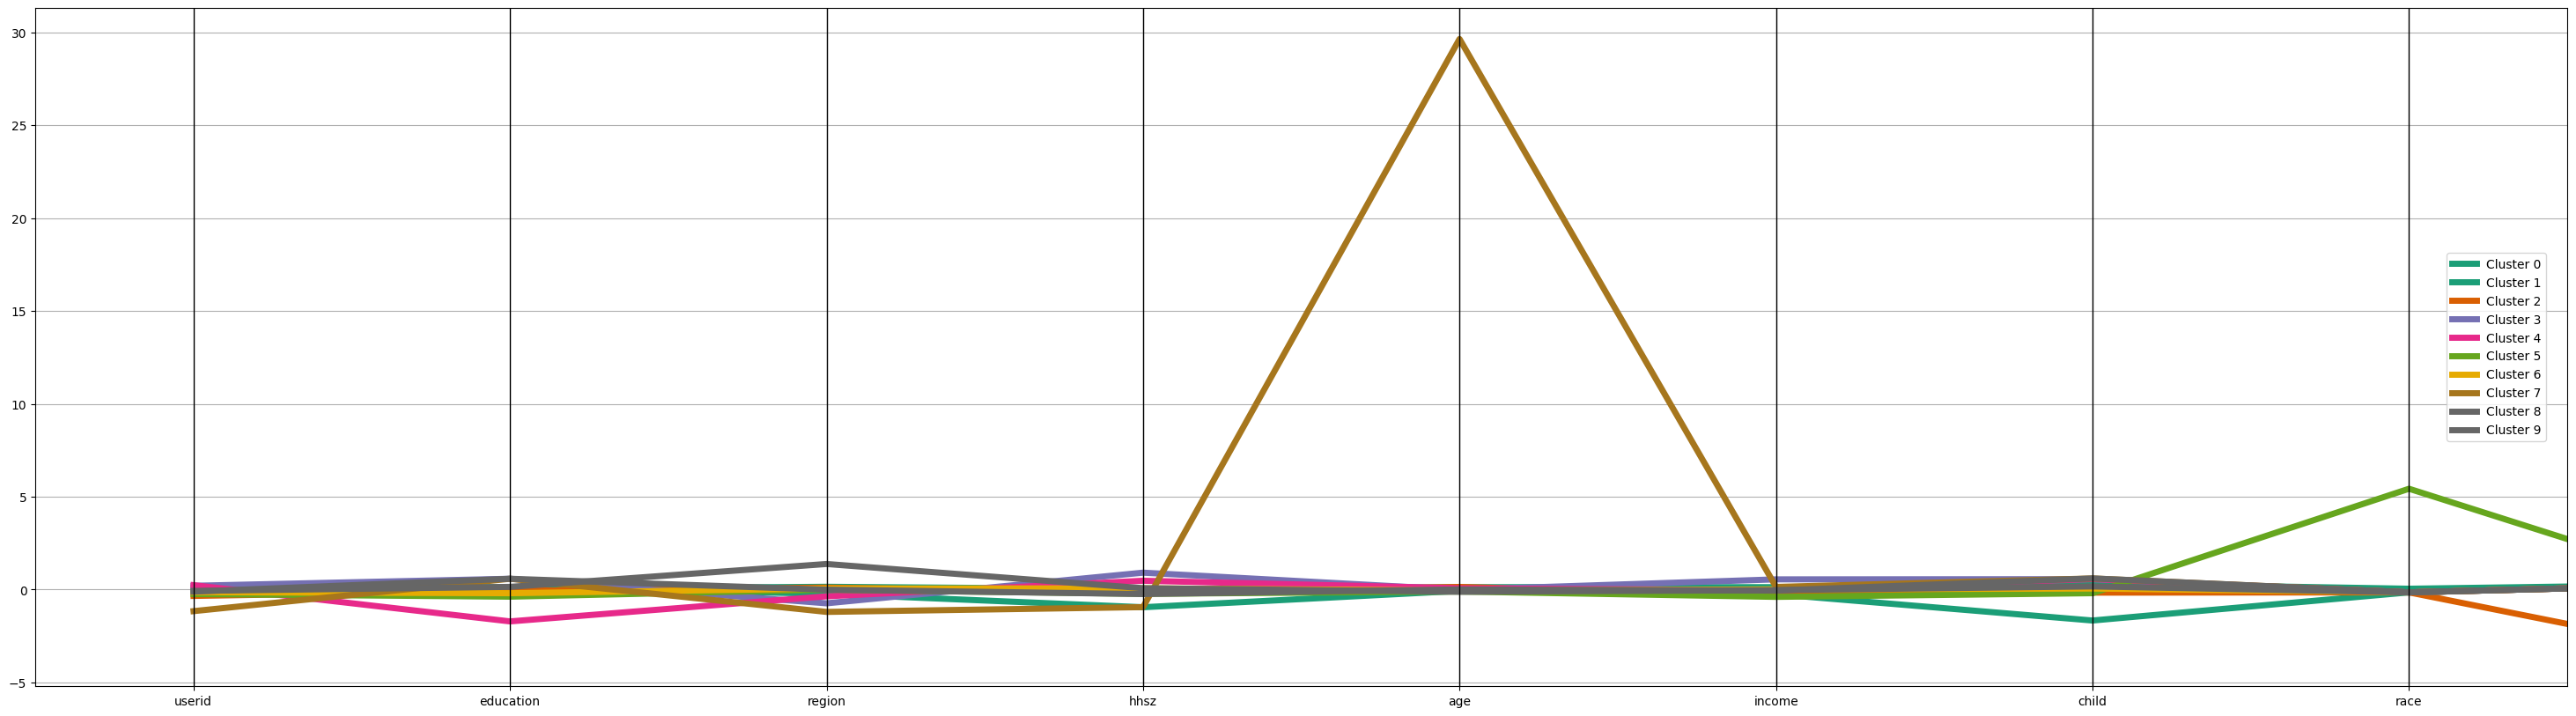

In [36]:
centroids  = pd.DataFrame(kmeans.cluster_centers_, columns = clusters_df_drop_norm.columns)
pd.set_option('display.precision',3)
print(centroids)
pd.set_option('display.precision',6)

centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
fig = plt.figure(figsize = (10,10),facecolor = 'white')
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids,class_column='cluster', colormap='Dark2',linewidth= 5)
plt.legend(loc = 'center left',bbox_to_anchor = (0.95,0.5))
plt.xlim(-0.5,7.5)